## 75.06/95.58 Organización de Datos: Trabajo Práctico 1
### Primer Cuatrimestre de 2020 



In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.parsing.preprocessing import STOPWORDS
import string
%matplotlib inline
import plotly.express as px

pd.set_option('mode.chained_assignment', None)
plt.rcParams['font.sans-serif'] = ['Source Han Sans TW', 'sans-serif']

tweets = pd.read_csv('train.csv') 
tweets.tail()

/Users/matiascano/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [8]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [9]:
tweets['text'].describe()

count                                                  7613
unique                                                 7503
top       11-Year-Old Boy Charged With Manslaughter of T...
freq                                                     10
Name: text, dtype: object

In [10]:
tweets['location'].describe()

count     5080
unique    3341
top        USA
freq       104
Name: location, dtype: object

In [11]:
tweets['keyword'].describe()

count           7552
unique           221
top       fatalities
freq              45
Name: keyword, dtype: object

In [12]:
duplicates = tweets.duplicated(subset = 'text', keep = False)
duplicates.value_counts()

False    7434
True      179
dtype: int64

In [13]:
tweets.drop_duplicates(subset = 'text', keep = False, inplace = True)
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7434 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7434 non-null   int64 
 1   keyword   7378 non-null   object
 2   location  4982 non-null   object
 3   text      7434 non-null   object
 4   target    7434 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 348.5+ KB


### Cantidad de reales vs falsos

In [87]:
dist = tweets['target'].value_counts(normalize=True).to_frame().reset_index()

In [88]:
dist.columns = ['target', 'total']
dist['total'] = dist['total'] * 100

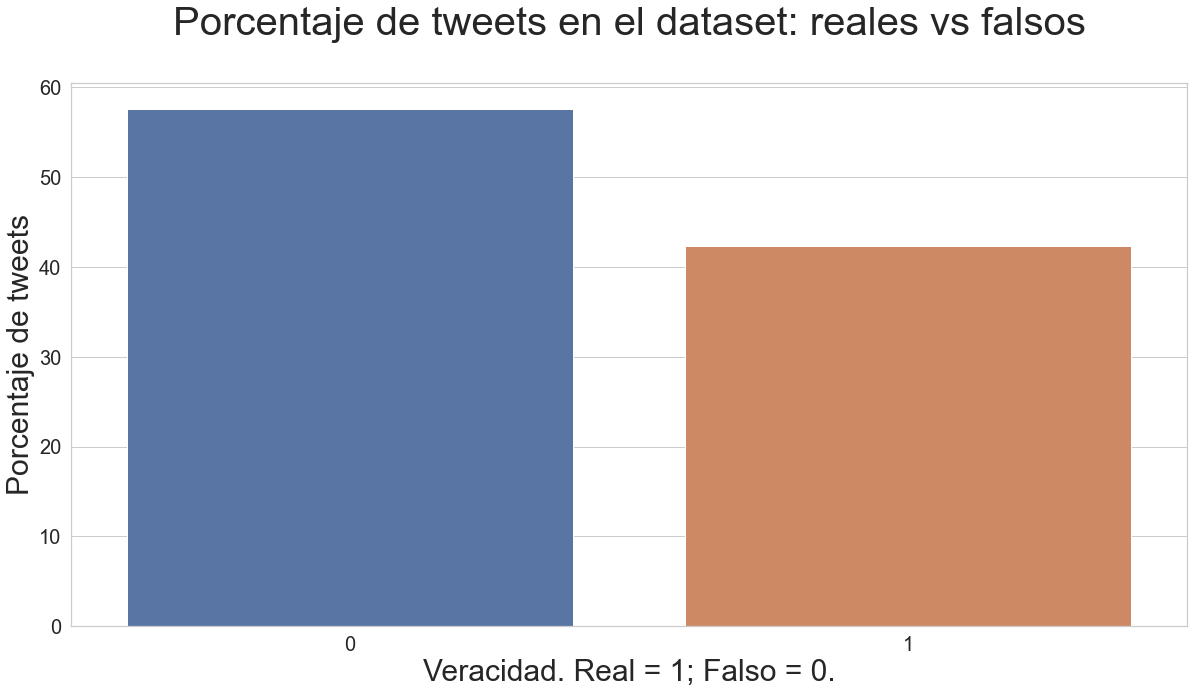

In [89]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))
ax = sns.barplot(x="target", y="total", data=dist)
ax.set_title('Porcentaje de tweets en el dataset: reales vs falsos\n', fontsize=40)
ax.set_ylabel('Porcentaje de tweets', fontsize=30)
ax.set_xlabel('Veracidad. Real = 1; Falso = 0.', fontsize=30)
ax.tick_params(labelsize=20)

## Desastres

### Top 50 desastres comentados en los tweets

In [ ]:
desastres = tweets.groupby("keyword").agg({"target":["count","mean"]})
level0 = desastres.columns.get_level_values(0)
level1 = desastres.columns.get_level_values(1)
desastres.columns = level0 + "_" + level1
desastres.sort_values(by="target_count",ascending = False,inplace = True)
desastres = desastres.head(50) #TOP 50

In [ ]:
fig = plt.figure(figsize=(20,20))
grafico = sns.barplot(data = desastres,x = "target_count",y = desastres.index)
grafico.set_title("Top 50 desastres comentados en tweets",fontsize = 14)
grafico.set_xlabel("Cantidad de veces mencionado",fontsize = 14)
grafico.set_ylabel("Desastre",fontsize = 14)
grafico.plot()

### Top 50 desastres comentados en los tweets

In [ ]:
desastres = tweets.groupby("keyword").agg({"target":["count","mean"]}).copy()
level0 = desastres.columns.get_level_values(0)
level1 = desastres.columns.get_level_values(1)
desastres.columns = level0 + "_" + level1
desastres.sort_values(by="target_count",ascending = False,inplace = True)
desastres = desastres.head(50) #TOP 50

In [ ]:
fig = plt.figure(figsize=(20,20))
grafico = sns.barplot(data = desastres,x = "target_count",y = desastres.index)
grafico.set_title("Top 50 desastres comentados en tweets",fontsize = 14)
grafico.set_xlabel("Cantidad de veces mencionado",fontsize = 14)
grafico.set_ylabel("Desastre",fontsize = 14)
grafico.plot()

## Texto

### Top palabras con más apariciones en tweets

In [ ]:
def by_word_count(dataframe):
    word_list = dataframe["text"].str.split()
    all_stopwords_gensim = STOPWORDS.union(set(string.punctuation))
    filtered = [word.lower() for word in np.concatenate(word_list.values) if not word in all_stopwords_gensim]
    words = pd.DataFrame(filtered,columns = ["word"])
    words["amount"] = 1
    by_count = words.groupby(["word"]).agg({"amount":["count"]})
    level0 = by_count.columns.get_level_values(0)
    level1 = by_count.columns.get_level_values(1)
    by_count.columns = level0 + "_" + level1
    by_count.sort_values(by="amount_count",ascending = False,inplace = True)
    return by_count.head(50)

In [ ]:
true_by_word = tweets["target"] == 1
true_by_word = by_word_count(tweets[true_by_word])
false_by_word = tweets["target"] == 0
false_by_word = by_word_count(tweets[false_by_word])

In [ ]:
fig = plt.figure(figsize=(20,20))
grafico = sns.barplot(data = true_by_word,x = "amount_count",y=true_by_word.index)
grafico.set_title("Top 50 palabras usadas en tweets verdaderos",fontsize = 14)
grafico.set_xlabel("Cantidad de veces",fontsize = 14)
grafico.set_ylabel("Palabra",fontsize = 14)
grafico.plot()

In [ ]:
fig = plt.figure(figsize=(20,20))
grafico = sns.barplot(data = false_by_word,x = "amount_count",y=false_by_word.index)
grafico.set_title("Top 50 palabras usadas en tweets falsos",fontsize = 14)
grafico.set_xlabel("Cantidad de veces",fontsize = 14)
grafico.set_ylabel("Palabra",fontsize = 14)
grafico.plot()

### Longitud de tweet

In [ ]:
tweets_length = tweets[['text','target']]
tweets_length.count()

In [ ]:
tweets_length['text'].hasnans

In [ ]:
tweets_length['length'] = tweets_length['text'].str.len()
tweets_length.head()

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
tweet_len = tweets_length[tweets_length['target'] == 1]['length']
ax1.hist(tweet_len,color='green')
ax1.set_title('Tweets reales')
tweet_len = tweets_length[tweets_length['target'] == 0]['length']
ax2.hist(tweet_len,color='red')
ax2.set_title('Tweets falsos')
fig.suptitle('Comportamiento de la longitud del tweet')
plt.show()

In [ ]:
g = sns.boxplot(x = 'target', y = 'length', data = tweets_length, width = 0.4,\
                palette = [(0.86, 0.3712, 0.33999999999999997),(0.30196078431372547, 0.6862745098039216, 0.2901960784313726)])
g.set_title("Largo de los tweets según target", fontsize = 25)
g.set_xlabel("Veracidad (0 = Falso, 1 = Verdadero)", fontsize = 15)
g.set_ylabel("Largo de los tweets (en caracteres)", fontsize = 15)
sns.set(rc = {'figure.figsize' : (15,10)})
plt.show()

In [ ]:
tweets_length['avg_word_length'] = tweets_length['text'].str.split().apply(lambda x: [len(y) for y in x]).transform(lambda x: np.mean(x))
tweets_length.head()

In [ ]:
fig = px.histogram(tweets_length, x="avg_word_length", color="target", marginal="box", width = 1200, height = 550,
                             nbins = 300, title = 'Distribución de largo promedio de palabras por tweet individual')
fig.update_layout(
    xaxis_title="Largo promedio de la palabra",
    yaxis_title="Cantidad",
    font=dict(
        family="Courier New, monospace",
        size=15,
        color="#7f7f7f"
    )
)
fig.update_layout(legend_title_text="Veracidad")


fig.show()

In [ ]:
tweets_length['amount_of_words'] = tweets_length['text'].str.split().transform(lambda x: len(x))
tweets_length.head()

In [ ]:
g = sns.kdeplot(tweets_length[tweets_length['target'] == 1]['amount_of_words'], color="blue", label='Cant de palabras por tweet Target = 1', shade=True)
g = sns.kdeplot(tweets_length[tweets_length['target'] == 0]['amount_of_words'], color="red", label='Cant de palabras por tweet Target = 0', shade=True)
g.set_title('Cantidad de palabras por tweet según target', fontsize = 20)
g.set_xlabel('Longitud en palabras del tweet', fontsize = 15)
plt.show()

In [ ]:
#Cantidad de palabras únicas en el tweet
unique_words_by_tweet = tweets_length['text'].transform(lambda x: x.split()).transform(lambda x: pd.Series(x).unique()).transform(lambda x: len(x))
tweets_length['amount_of_unique_words'] = unique_words_by_tweet
tweets_length

In [ ]:
g = sns.kdeplot(tweets_length[tweets_length['target'] == 1]['amount_of_unique_words'], color="blue", label='Cant de palabras únicas por tweet Target = 1', shade=True)
g = sns.kdeplot(tweets_length[tweets_length['target'] == 0]['amount_of_unique_words'], color="red", label='Cant de palabras únicas por tweet Target = 0', shade=True)
g.set_title('Cantidad de palabras únicas por tweet según target', fontsize = 20)
g.set_xlabel('Longitud en palabras únicas del tweet', fontsize = 15)
plt.show()

In [ ]:
tweets_length['avg_length'] = tweets_length.groupby('target')['length'].transform('mean')
tweets_length.head()

In [ ]:
tweets_length['is_above_avg_length'] = tweets_length['length'] > tweets_length['avg_length']
tweets_length.head()

In [ ]:
groupedby_is_above_avg_length = tweets_length.groupby('is_above_avg_length').agg({'target':['mean','count']})
groupedby_is_above_avg_length

In [ ]:
groupedby_is_above_avg_length[('target','mean')].plot(kind = 'bar', figsize = (15,10), rot = 0, colormap = 'Accent')
plt.title('Target promedio segun si sobrepasan el largo promedio', fontsize = 20)
plt.xlabel('Está por arriba del largo promedio', fontsize = 15)
plt.ylabel('Target promedio', fontsize = 15)
plt.ylim(0,1)
plt.show()

In [ ]:
tweets_length['contains_link'] = tweets_length['text'].str.contains('http://' or 'https://')

In [ ]:
tweets_to_corr = tweets_length[['length','target','is_above_avg_length','avg_word_length','amount_of_words','amount_of_unique_words','contains_link']]
tweets_to_corr['avg_target_by_length'] = tweets_length.groupby('length')['target'].transform('mean')
tweets_to_corr.head(20)
tweets_to_corr.corr(method = 'spearman')

In [ ]:
sns.heatmap(tweets_to_corr.corr(method = 'spearman'), annot = True)
plt.title('Heatmap de correlación entre distintas columnas', fontsize = 20)
plt.show()

### Sentimiento de tweet

Primera hipotesis: Al ser cosas noticiosas deberian ser mas neutras.

Pero, teniendo en cuenta que procesa el sentimiento.
Deberian ser neutros tendiendo a negativos ya que al ser desastres naturales son literalmente eso, desastres, y se espera el uso de ciertas palabras que no implican algo muy positivo.

Además, al informar sobre desastres naturales las palabras que describen este tipo de eventos apuntan en general a cosas más negativas.

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

In [ ]:
sia = SentimentIntensityAnalyzer()
def return_sia_compound_values(text):
    return sia.polarity_scores(text)['compound']

tweets_feeling_1 = tweets_length.groupby('target')['text'].get_group(1).apply(lambda x: return_sia_compound_values(x))
tweets_feeling_0 = tweets_length.groupby('target')['text'].get_group(0).apply(lambda x: return_sia_compound_values(x))

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,8))

sns.distplot(tweets_feeling_0, bins = 40, color = 'SkyBlue', ax = ax1)
ax1.set_title('Sentimiento - Target = 0', fontsize = 15)
ax1.set_xlabel('Sentimiento', fontsize = 15)

sns.distplot(tweets_feeling_1, bins = 40, color = 'SkyBlue', ax = ax2)
ax2.set_title('Sentimiento - Target = 1', fontsize = 15)
ax2.set_xlabel('Sentimiento', fontsize = 15)

ax1.set_ylim(0,6)
ax2.set_ylim(0,6)
fig.suptitle('Sentimiento del tweet. De -1 a 1, más negativo a más positivo.', fontsize = 20)
plt.show()

In [ ]:
def return_sia_values(text):
    return [sia.polarity_scores(text)['pos'], sia.polarity_scores(text)['neg'], sia.polarity_scores(text)['neu']]

sia_values = tweets_length['text'].transform(lambda x: return_sia_values(x)).to_frame()

sia_values['pos'] = sia_values['text'].apply(lambda x: pd.Series(x[0]))
sia_values['neg'] = sia_values['text'].apply(lambda x: pd.Series(x[1]))
sia_values['neu'] = sia_values['text'].apply(lambda x: pd.Series(x[2]))

sia_values['target'] = tweets_length['target']
sia_values.head()

In [ ]:
ax = sia_values.groupby('target').mean()[['pos', 'neg', 'neu']].plot.area(cmap='Pastel2', figsize=(10, 8))
ax.set_xlabel('Veracidad. 0: Falso, 1: Verdadero.')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], ['Sentimiento Neutro', 'Sentimiento Negativo', 'Sentimiento Positivo'], loc='upper left');

### Cantidad de stopwords

In [ ]:
all_stopwords_gensim = STOPWORDS.union(set(string.punctuation))
tweets_by_stopwords = tweets[['target', 'text']]
tweets_by_stopwords['stopwords_count'] = tweets_by_stopwords['text']\
.apply(lambda x: len([word for word in str(x).lower().split() if word in all_stopwords_gensim]))
tweets_by_stopwords.drop(columns='text', inplace=True)
tweets_by_stopwords.head()

In [ ]:
tweets_by_stopwords = tweets_by_stopwords.groupby('target').agg({'stopwords_count' : 'sum'})
tweets_by_stopwords.reset_index(inplace = True)
tweets_by_stopwords.loc[0,'target'] = "False"
tweets_by_stopwords.loc[1, 'target'] = "True"
tweets_by_stopwords

In [ ]:
g = sns.barplot(x = 'target', y = 'stopwords_count', data = tweets_by_stopwords, palette = "Set2")
g.set_title("Cantidad de stopwords segun target", fontsize = 25)
g.set_xlabel("Veracidad", fontsize = 15)
g.set_ylabel("Cantidad de stopwords", fontsize = 15)

### Uso de puntuación

In [ ]:
tweets_punctuation = tweets[['text','target']]

In [ ]:
def contains_punctuation(text):
    punctuation = set(string.punctuation)
    for character in text:
        if character in punctuation:
            return True
    return False

def amount_of_punctuation(text):
    punctuation = set(string.punctuation)
    amount = 0
    for character in text:
        if character in punctuation: amount += 1
    return amount

In [ ]:
tweets_punctuation['contains_punctuation'] = tweets_punctuation['text'].apply(lambda x: contains_punctuation(x))
tweets_punctuation['amount_of_punctuation'] = tweets_punctuation['text'].apply(lambda x: amount_of_punctuation(x))
tweets_punctuation = tweets_punctuation[(tweets_punctuation['amount_of_punctuation']) < (tweets_punctuation['amount_of_punctuation'].std() * 10)]
tweets_punctuation.groupby('target')['amount_of_punctuation'].describe()

In [ ]:
ax = sns.violinplot(x  ="target", y = "amount_of_punctuation", data = tweets_punctuation, palette = [(0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)])

ax.set_title('Cantidad de caracteres de puntuación utilizados en un tweet por target', fontsize = 20)
ax.set_xlabel('Veracidad. Verdadero: target = 1; Falso: target = 0 ', fontsize = 15)
ax.set_ylabel('Cantidad de caracteres de puntuación utilizados en el tweet', fontsize = 15)
plt.show()

### Similitud entre tweets

In [116]:
fake = tweets.groupby("target").get_group(0)
real = tweets.groupby("target").get_group(1)

In [117]:
from datasketch import MinHash,MinHashLSH
import re

def preprocess(text):
    text = re.sub(r'[^\w\s]','',text)
    tokens = text.lower()
    tokens = tokens.split()
    return tokens

def get_minhash(data):
    minhash = []
    for row in data.iterrows():
        text = row[1][3]
        id = row[1][0]
        tokens = preprocess(text)
        m = MinHash(num_perm=512)
        for s in tokens:
            m.update(s.encode('utf8'))
        minhash.append([id,m])
    return minhash

In [119]:
fake_minhash = get_minhash(fake)
real_minhashs = get_minhash(real)

In [ ]:
def get_similar(minhashs):
    total = []
    for i in range(1,100):
        lsh = MinHashLSH(threshold=i/100, num_perm=512)
        for minhash in minhashs:
            lsh.insert(minhash[0],minhash[1])
        values = []
        for minhash in minhashs:
            values.append(len(lsh.query(minhash[1])))
        total.append(values)
    return total

In [ ]:
treshold_fake = get_similar(fake_minhashs)
treshold_real = get_similar(real_minhashs)

In [ ]:
real_avg = []
fake_avg = []
indx = []

for i in range(1,99): 
    real_avg.append(sum(treshold_real[i])//len(treshold_real[i]))
    fake_avg.append(sum(treshold_fake[i])//len(treshold_fake[i]))
    indx.append(i)

In [ ]:
real_and_fake = pd.DataFrame(real_avg,index = indx)
real_and_fake.columns = ["AVG Match Real"]
real_and_fake["AVG Match Fake"] = fake_avg
real_and_fake.reset_index(inplace=True)
real_and_fake = real_and_fake.head(40)

In [ ]:
ax = real_and_fake.plot.scatter(x="AVG Match Real",y="index",color="r",label="Reales",figsize=(12,10))
real_and_fake.plot.scatter(x="AVG Match Fake",y="index",color="b",label="Falsos",ax=ax)
real_and_fake.plot(x="AVG Match Fake",y="index",color="b",label="",ax=ax)
real_and_fake.plot(x="AVG Match Real",y="index",color="r",label="",ax=ax)
plt.legend(loc='best')
ax.set_xlabel("Promedio de tweets similares")
ax.set_ylabel("Minimo porcentaje de similitud")
ax.plot()

## Texto: Links

### Relacion: links en tweet vs. veracidad

In [ ]:
sns.set(style="whitegrid")
g = sns.countplot(x = 'target', hue = "contains_link", data = tweets_length, palette = [sns.color_palette()[3], sns.color_palette()[2]])

g.set_title('Cantidad de tweets que poseen o no links según target', fontsize = 20)
g.set_xlabel('Veracidad (verdadero o falso)', fontsize = 20)
g.set_ylabel('Cantidad de tweets', fontsize = 20)
plt.ylim(0,3000)
sns.set(rc = {'figure.figsize' : (15,10)})

g.legend(['No','Si'], loc = 'upper right', title = 'Contiene link');

plt.show()

In [ ]:
tweets_length[tweets_length['contains_link']].groupby('target').agg({'length':['count', 'mean']})

In [ ]:
g = sns.boxplot(x = 'target', y = 'length', data = tweets_length[tweets_length['contains_link']], palette = [(0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0)], width = 0.4)
g.set_title("Largo de los tweets que poseen links según target", fontsize = 25)
g.set_xlabel("Veracidad (0 = Falso, 1 = Verdadero)", fontsize = 15)
g.set_ylabel("Largo de los tweets (en caracteres)", fontsize = 15)
sns.set(rc = {'figure.figsize' : (15,10)})

Según twitter developer:
When a HTTPS-based URL is passed while link wrapping is enabled, a HTTPS-based t.co link will be produced. HTTPS-based t.co links are one character longer than standard t.co links to account for the protocol change.

Esto es porque los HTTPS son más seguros.

In [ ]:
contains_https = tweets_length[tweets_length['text'].str.contains('https://')].groupby('target')['text'].count()
contains_http = tweets_length[tweets_length['text'].str.contains('http://')].groupby('target')['text'].count()
contains_link = pd.DataFrame({'contains_safer_link': contains_https, 'contains_non_safer_link': contains_http})
contains_link

In [ ]:
graph = contains_link.plot(color=["SkyBlue","IndianRed"], kind = 'bar', figsize = (15,10), rot = 0)
graph.legend(['Contiene link más seguro','Contiene link menos seguro'], loc = 'upper right')
plt.title('Cantidad de tweets que poseen links seguros o no seguros según target', fontsize = 20)
plt.xlabel('Veracidad (0 = Falso, 1 = Verdadero)', fontsize = 20)
plt.ylabel('Cantidad de tweets con links', fontsize = 20)
plt.ylim(0,2250)
plt.show()

## Texto: Menciones

### Personas más mencionadas

In [45]:
tweets_with_mentions = tweets.loc[tweets['text'].str.contains('@'), ['text', 'target']]
mentions = tweets_with_mentions['text'].str.findall(r'@.\S*?(?=\s|[:]|$)').to_frame()
#La regex encuentra todas las palabras que empiecen con '@' y al mismo tiempo elimina los '@:' y '@ '
#El arroba se usa como expresion para indicar la hora tambien

In [46]:
mentions.head()

,text
31,[@bbcmtd]
36,[@PhDSquares]
43,[@southridgelife]
54,[@Alexis_Sanchez]
57,[@Û_]


In [47]:
mentions['target'] = tweets_with_mentions['target']

In [48]:
mentions.head()

,text,target
31,[@bbcmtd],1
36,[@PhDSquares],0
43,[@southridgelife],0
54,[@Alexis_Sanchez],0
57,[@Û_],0


In [49]:
mentions_to_group = mentions.explode('text')

In [50]:
mentions_to_group.head()

,text,target
31,@bbcmtd,1
36,@PhDSquares,0
43,@southridgelife,0
54,@Alexis_Sanchez,0
57,@Û_,0


In [51]:
mentions_grouped = mentions_to_group.groupby(['text']).agg({'text': 'count', 'target':'sum'}).nlargest(20, 'text')
mentions_grouped['fake'] = mentions_grouped['text'] - mentions_grouped['target']
mentions_grouped.columns = ['total', 'real', 'fake']

In [52]:
mentions_grouped.head()

,total,real,fake
text,,,
@YouTube,82,17,65
@ArianaGrande,11,0,11
@Change,9,4,5
@FoxNews,9,8,1
@POTUS,9,6,3


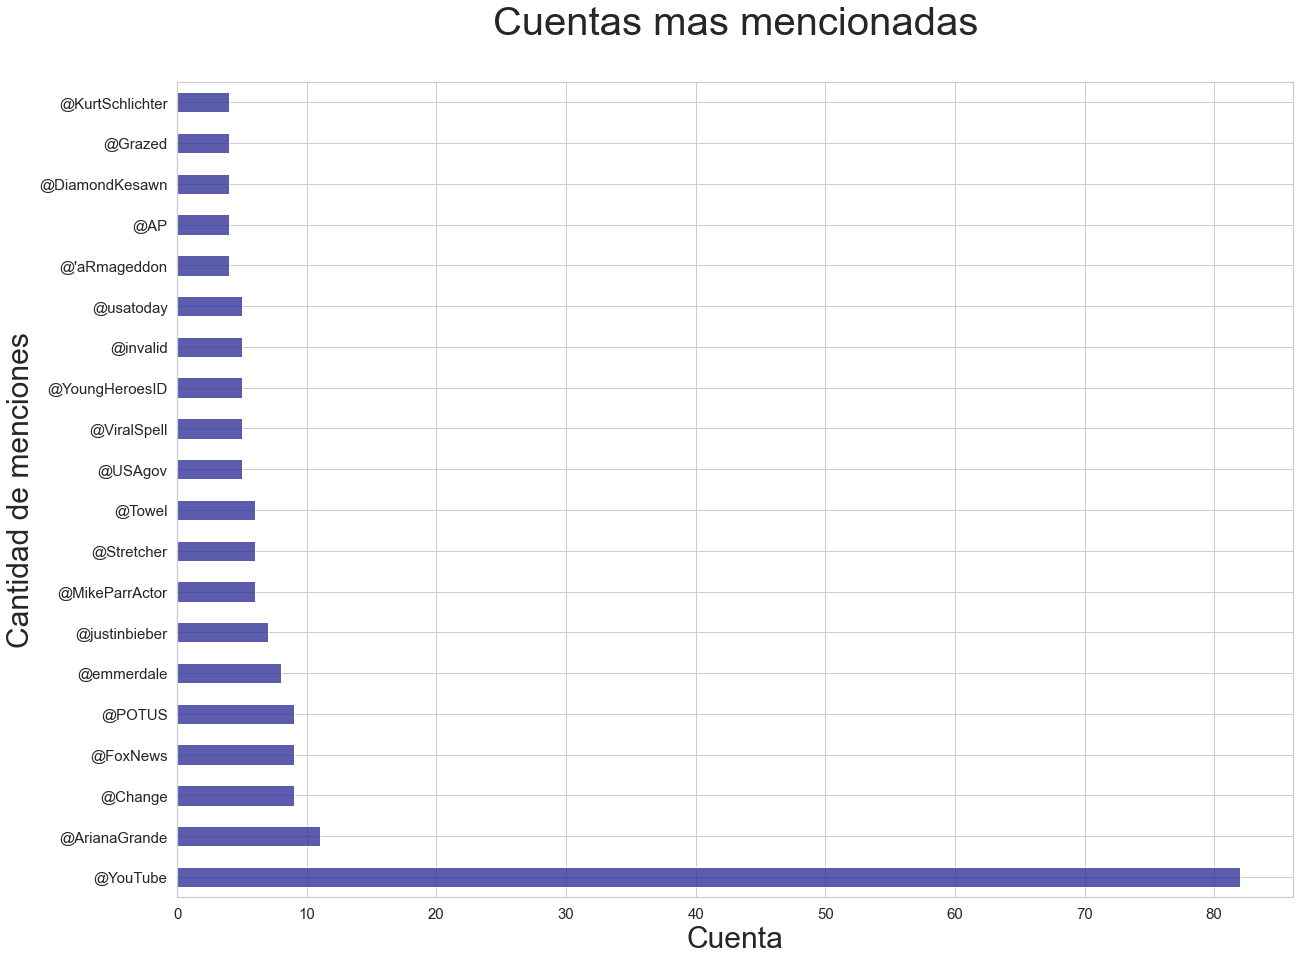

In [79]:
mentions_grouped.loc[:, 'total'].plot(kind='barh', color=(0.2, 0.2, 0.6, 0.8), figsize=(20, 15))
ax = plt.gca()
ax.set_title('Cuentas mas mencionadas\n', fontsize=40)
ax.set_xlabel('Cuenta', fontsize=30)
ax.set_ylabel('Cantidad de menciones', fontsize=30)
ax.tick_params(labelsize=15)

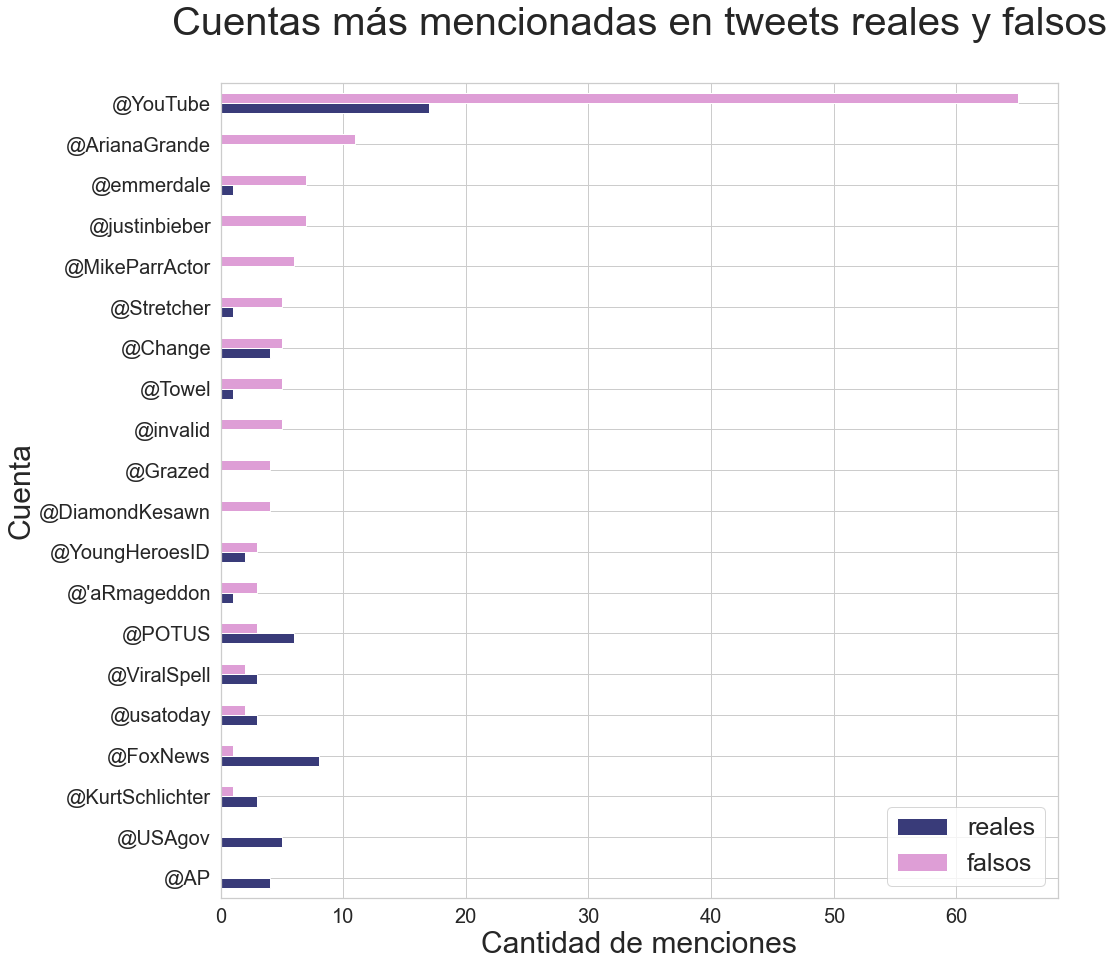

In [78]:
ax = mentions_grouped.sort_values(by=['fake']).loc[:, ['real', 'fake']].plot(kind='barh', figsize=(15, 15), colormap='tab20b')
ax.set_title('Cuentas más mencionadas en tweets reales y falsos\n', fontsize=40)
ax.set_ylabel('Cuenta', fontsize=30)
ax.set_xlabel('Cantidad de menciones', fontsize=30)
ax.tick_params(labelsize=20)
ax.legend(labels=['reales', 'falsos'], fontsize=25)

## Texto: Hashtags

### Top Hastags más usados

In [80]:
tweets_with_ht = tweets.loc[tweets['text'].str.contains('#')]

In [81]:
tweets_with_ht['hashtags'] = tweets_with_ht['text'].str.findall(r'#[^?\s].*?(?=\s|$)')
tweets_hashtags = tweets_with_ht.explode('hashtags')
tweets_hashtags.dropna(subset = ["hashtags"],inplace = True)
tweets_hashtags["hashtags"] = tweets_hashtags["hashtags"].str.lower()

In [82]:
tweets_hashtags.head()

,id,keyword,location,text,target,hashtags
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,#earthquake
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,#wildfires
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,#alaska
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,#wildfires
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,#rockyfire


In [83]:
hashtags_top = tweets_hashtags.groupby('hashtags').agg({'target':['count', 'mean']})
hashtags_top.sort_values(by=("target", "count"), ascending = False, inplace = True)
hashtags_top[("target", "mean")] = (hashtags_top[("target", "mean")] * 100).round()
hashtags_top = hashtags_top.head(50).reset_index()
hashtags_top.head()

hashtags target       
               count   mean
0       #news     73   73.0
1   #prebreak     30   43.0
2        #hot     30   43.0
3       #best     30   43.0
4  #hiroshima     21  100.0

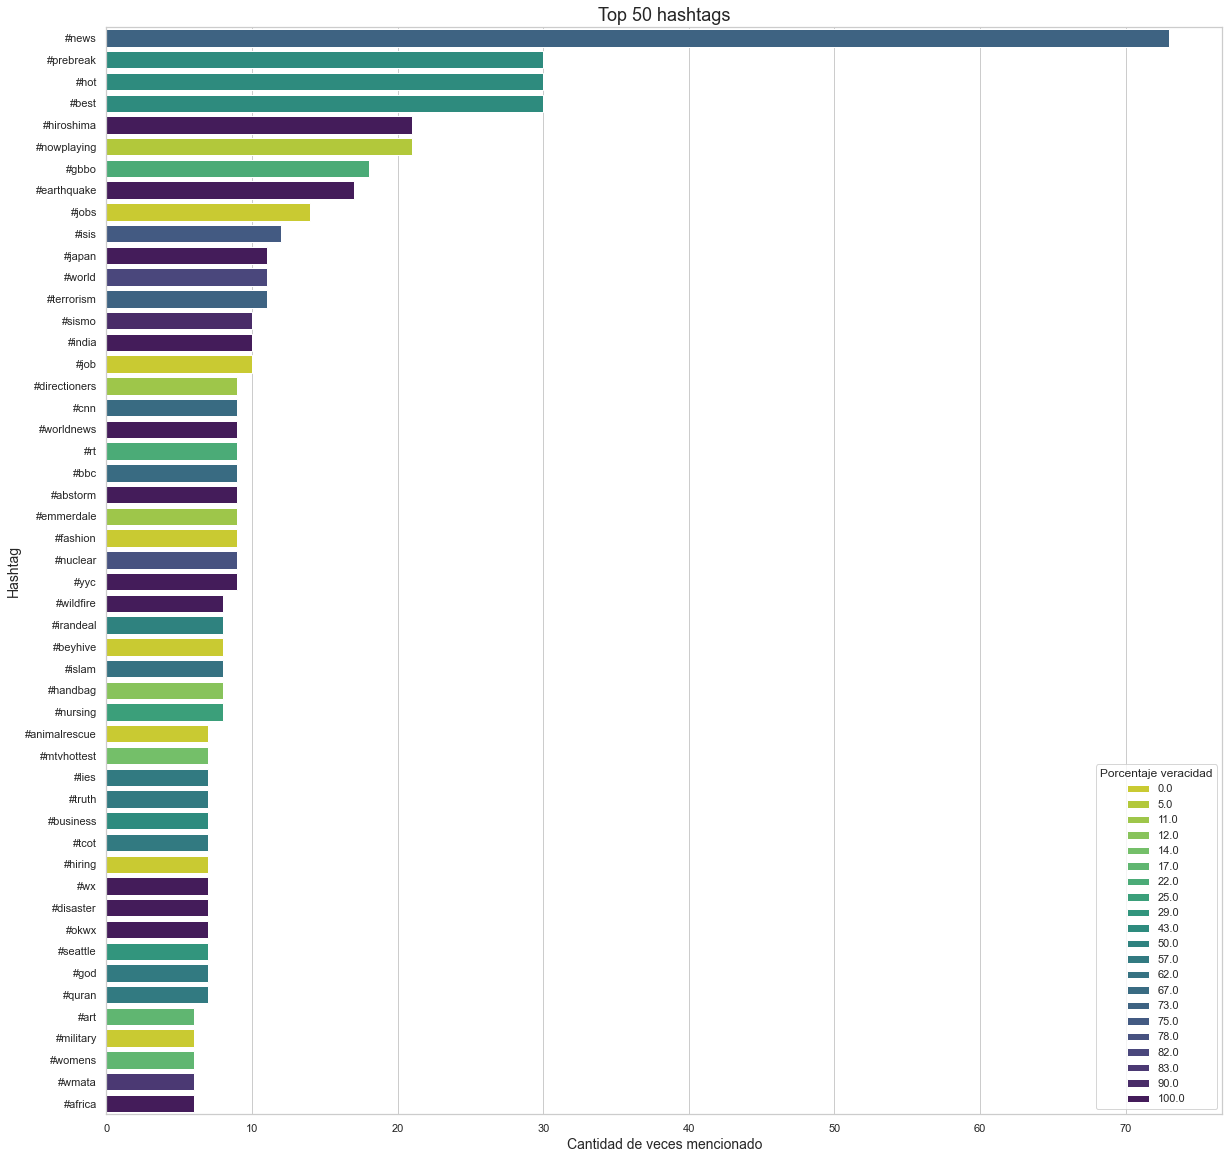

In [84]:
fig = plt.figure(figsize = (20, 20))
plot = sns.barplot(data = hashtags_top, x = ("target","count"), y = 'hashtags', hue = ('target','mean'), dodge = False, palette = "viridis_r")
plot.set_title("Top 50 hashtags", fontsize = 18)
plot.set_xlabel("Cantidad de veces mencionado", fontsize = 14)
plot.set_ylabel("Hashtag", fontsize = 14)
plt.legend(title='Porcentaje veracidad', loc='lower right')
plt.show(plot)

### Hashtags más usados en tweets reales y falsos

In [85]:
tweets_hashtags.head()

,id,keyword,location,text,target,hashtags
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,#earthquake
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,#wildfires
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,#alaska
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,#wildfires
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,#rockyfire


In [86]:
true_by_hashtags = tweets_hashtags.groupby("target").get_group(1)
false_by_hashtags = tweets_hashtags.groupby("target").get_group(0)

In [87]:
true_hashtags = ' '.join(true_by_hashtags["hashtags"].str.lower())
fake_hashtags = ' '.join(false_by_hashtags["hashtags"].str.lower())

In [88]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import imageio

twitter_coloring = imageio.imread("img/twitter.png",pilmode='RGB')
wc = WordCloud(width = 1920,height = 1080,background_color = "black",mask=twitter_coloring)
image_colors = ImageColorGenerator(twitter_coloring)

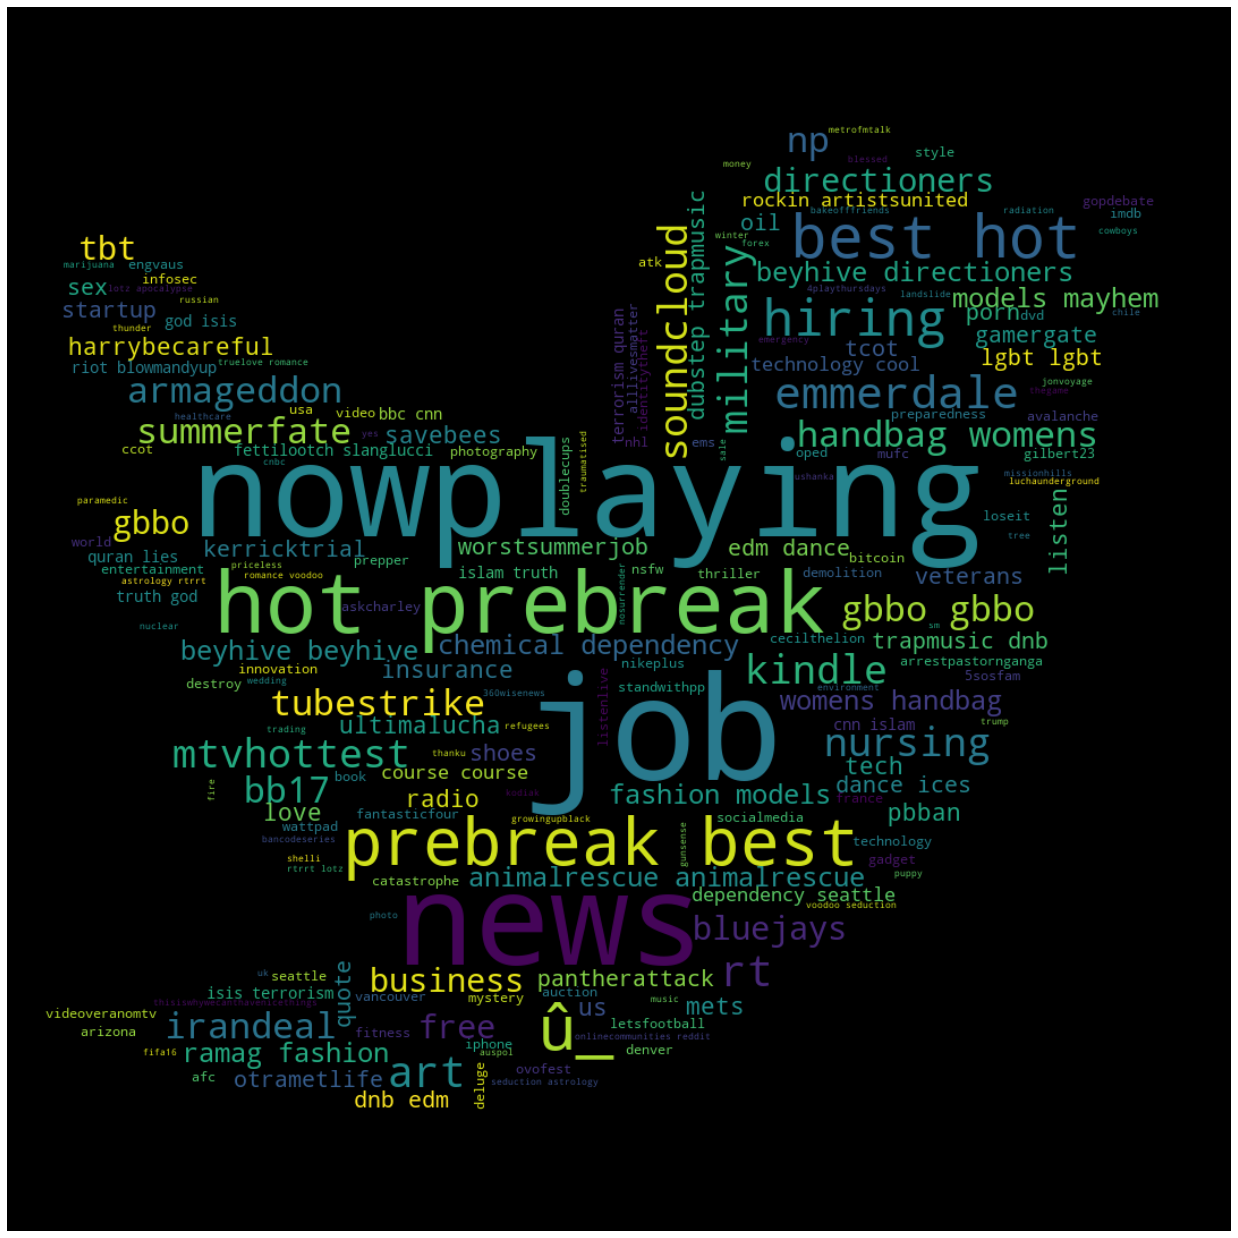

In [89]:
wc.generate(fake_hashtags)
fig, ax = plt.subplots(figsize=(17,17))
ax.imshow(wc, interpolation="bilinear")
ax.set_axis_off()
plt.tight_layout(pad=0)
plt.show()

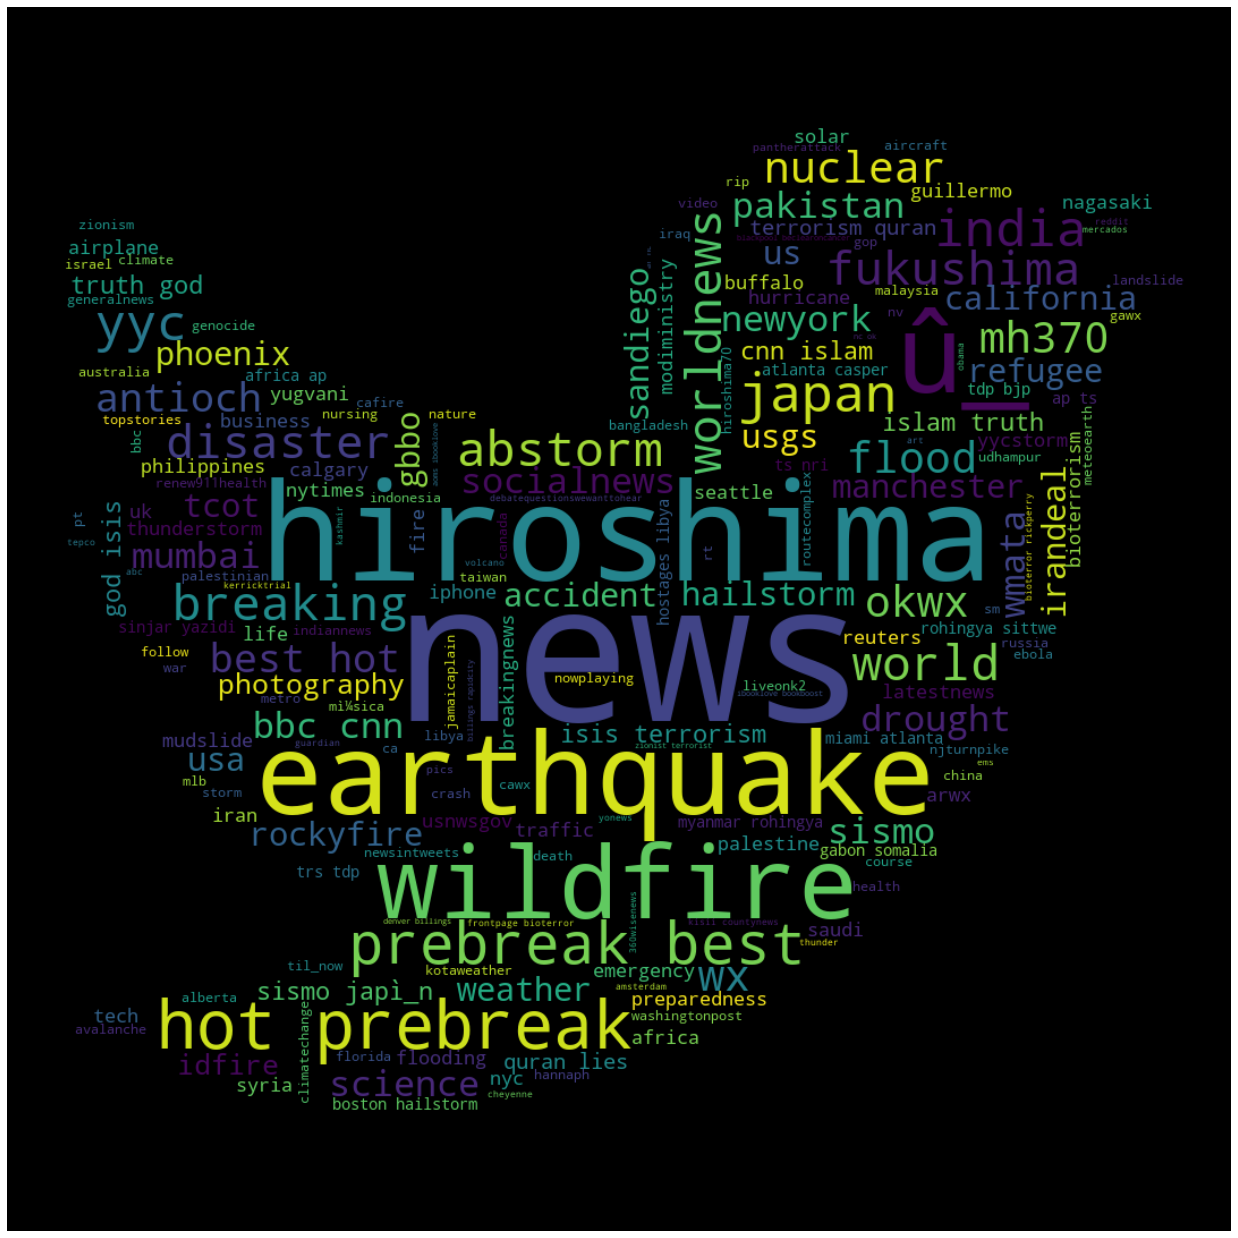

In [90]:
wc.generate(true_hashtags)
fig, ax = plt.subplots(figsize=(17,17))
ax.imshow(wc, interpolation="bilinear")
ax.set_axis_off()
plt.tight_layout(pad=0)
plt.show()

In [97]:
top_real_hashtags = true_by_hashtags.groupby('hashtags').agg({'target':'count'}).nlargest(50, columns='target')
top_real_hashtags.columns = ["real"]

In [100]:
top_fake_hashtags = false_by_hashtags.groupby('hashtags').agg({'target':'count'}).nlargest(50, columns="target")
top_fake_hashtags.columns = ["fake"]

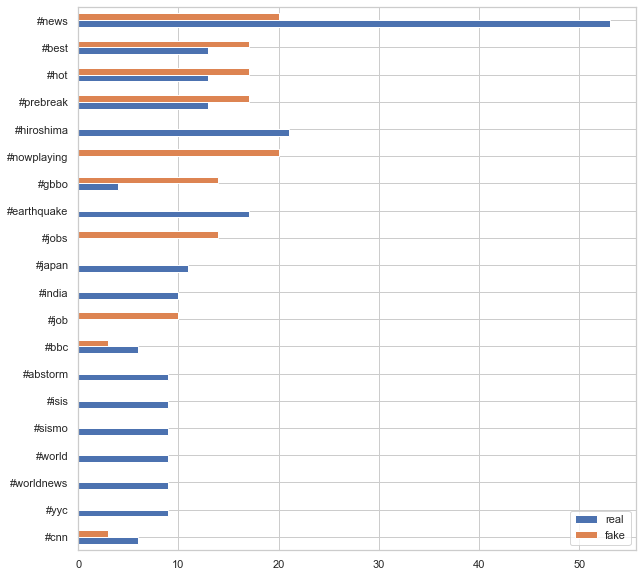

In [101]:
all_hashtags = pd.concat([top_real_hashtags,top_fake_hashtags],join="outer",axis=1)
all_hashtags.fillna(0,inplace=True)
all_hashtags['total'] = all_hashtags['real'] + all_hashtags['fake']
top_20_hashtags = all_hashtags.nlargest(20, "total")
ax = top_20_hashtags.sort_values(by='total').loc[:, ['real', 'fake']].plot(kind='barh', figsize=(10, 10))

### Hashtags en las ciudades con más desastres

In [ ]:
tweets_hashtags.dropna(subset = ['location', 'hashtags'], inplace= True)
tweets_hashtags = tweets_hashtags.loc[(tweets.target == 1), :]
hashtag_by_loc = tweets_hashtags.groupby('location').agg({'location':'count', 'hashtags': 'max'})
hashtag_by_loc = hashtag_by_loc.rename(columns = {'location': 'count'})
hashtag_by_loc = hashtag_by_loc.reset_index()
hashtag_by_loc = hashtag_by_loc.nlargest(25, 'count')
hashtag_by_loc.head()

In [ ]:
fig = plt.figure(figsize = (20, 20))
palette = sns.diverging_palette(220, 20, n=25)
grafico = sns.barplot(data = hashtag_by_loc, x = 'count', y = 'hashtags', hue = 'location', dodge = False, palette = palette)
grafico.set_title("Hashtags mas usados en las top 25 ubicaciones del mundo", fontsize = 14)
grafico.set_xlabel("Cantidad de veces mencionado", fontsize = 14)
grafico.set_ylabel("Hashtag", fontsize = 14)
plt.legend(title='Ubicacion', loc='lower right')
plt.show(grafico)

## Ubicaciones

### Top ciudades con mayor cantidad de tweets reales y falsos

In [14]:
#No importan las locaciones NAN
partial = tweets.dropna()

In [15]:
partial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4982 entries, 31 to 7581
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        4982 non-null   int64 
 1   keyword   4982 non-null   object
 2   location  4982 non-null   object
 3   text      4982 non-null   object
 4   target    4982 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 233.5+ KB


In [16]:
locations = partial[partial['location'].str.match(r'^([a-zA-Z,\s])*$') > 0]
locations.head()

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0


In [17]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3946 entries, 31 to 7581
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3946 non-null   int64 
 1   keyword   3946 non-null   object
 2   location  3946 non-null   object
 3   text      3946 non-null   object
 4   target    3946 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 185.0+ KB


In [18]:
locations['location'] = locations['location'].str.lower()

In [19]:
locations.head()

,id,keyword,location,text,target
31,48,ablaze,birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
33,50,ablaze,africa,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"philadelphia, pa",Crying out for more! Set me ablaze,0
35,53,ablaze,"london, uk",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
36,54,ablaze,pretoria,@PhDSquares #mufc they've built so much hype a...,0


In [20]:
top_20_locations = locations['location'].value_counts().nlargest(20).to_frame()
top_20_locations

,location
usa,104
new york,75
united states,50
london,49
canada,33
worldwide,29
uk,29
"los angeles, ca",28
nigeria,25
india,24


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


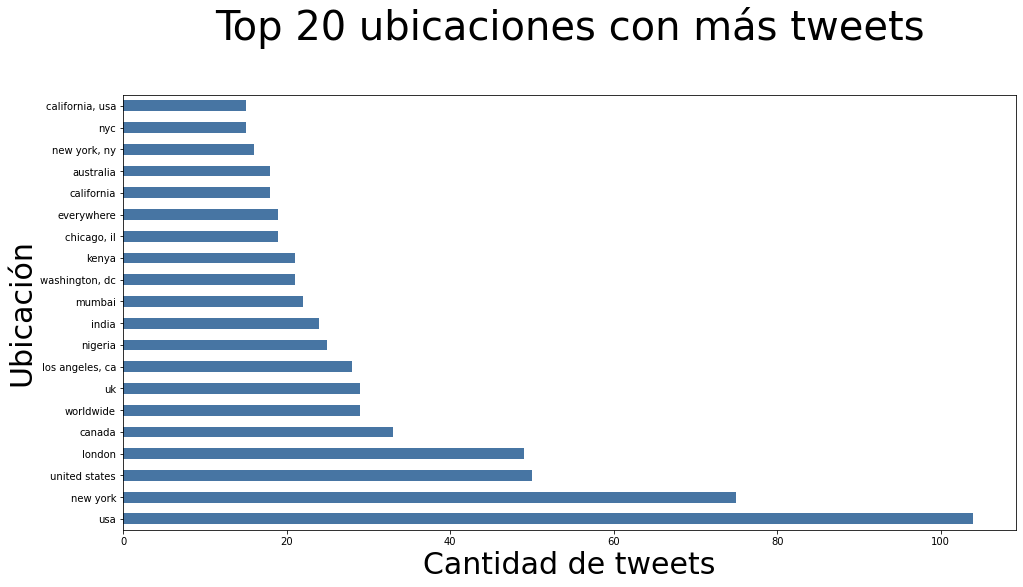

In [21]:
top_20_locations.plot(kind='barh',  rot=0, color=(0.2, 0.4, 0.6, 0.9), figsize=(16, 8))
ax = plt.gca()
ax.set_title('Top 20 ubicaciones con más tweets\n', fontsize=40)
ax.set_xlabel('Cantidad de tweets', fontsize=30)
ax.set_ylabel('Ubicación', fontsize=30)
ax.get_legend().remove()

In [22]:
locations.head()

,id,keyword,location,text,target
31,48,ablaze,birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
33,50,ablaze,africa,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"philadelphia, pa",Crying out for more! Set me ablaze,0
35,53,ablaze,"london, uk",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
36,54,ablaze,pretoria,@PhDSquares #mufc they've built so much hype a...,0


In [23]:
by_location = locations.groupby(['location']).agg({'target':['count', 'sum']})
level_0 = by_location.columns.get_level_values(0)
level_1 = by_location.columns.get_level_values(1)
by_location.columns = level_0 + '_' + level_1
by_location.reset_index(inplace=True)
by_location.head()

,location,target_count,target_sum
0,,1,1
1,glasgow,1,0
2,"melbourne, australia",1,0
3,news,1,1
4,alberta,1,1


In [24]:
by_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271 entries, 0 to 2270
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   location      2271 non-null   object
 1   target_count  2271 non-null   int64 
 2   target_sum    2271 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 53.4+ KB


In [25]:
import os.path
if(not os.path.isfile('locations.csv')):
    get_geodata()

def get_geodata():
    from geopy.geocoders import Nominatim
    from tqdm import tqdm
    from geopy.extra.rate_limiter import RateLimiter
    geolocator = Nominatim(user_agent="mile.marchese@gmail.com")
    tqdm.pandas()
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=2, max_retries=0)
    by_location['geodata'] = by_location['location'].progress_apply(geocode)
    by_location['address'] = by_location['geodata'].apply(lambda loc: loc.address if loc else None)
    by_location['point'] = by_location['geodata'].apply(lambda loc: tuple(loc.point) if loc else None)
    by_location.to_csv('locations.csv', index=False)

In [26]:
address = pd.read_csv('locations.csv', usecols=['location', 'target_count', 'target_sum', 'address']) 
address.head()

,location,target_count,target_sum,address
0,,1,1,NaN
1,glasgow,1,0,"Glasgow, Glasgow City, Scotland, G2 9SA, Unite..."
2,"melbourne, australia",1,0,"City of Melbourne, Victoria, Australia"
3,news,1,1,"34375, Abbotsford Centre, Abbotsford, Fraser V..."
4,alberta,1,1,"Alberta, Canada"


In [27]:
#Hay 374 que geopy no encontró
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271 entries, 0 to 2270
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   location      2271 non-null   object
 1   target_count  2271 non-null   int64 
 2   target_sum    2271 non-null   int64 
 3   address       1880 non-null   object
dtypes: int64(2), object(2)
memory usage: 71.1+ KB


In [28]:
not_found_addr = address[address['address'].isnull()]
not_found_addr.head()

,location,target_count,target_sum,address
0,,1,1,NaN
8,indiana,1,0,NaN
9,jariana town,1,0,NaN
12,"nevada carson city,freeman st",1,1,NaN
16,nxgerxa,1,0,NaN


In [29]:
address['address'].describe()

count                                   1880
unique                                  1430
top       New York, United States of America
freq                                      15
Name: address, dtype: object

In [30]:
not_found_addr['target_count'].value_counts(normalize=True)

1    0.941176
2    0.038363
3    0.015345
6    0.002558
4    0.002558
Name: target_count, dtype: float64

In [31]:
address['address'].describe()

count                                   1880
unique                                  1430
top       New York, United States of America
freq                                      15
Name: address, dtype: object

In [32]:
by_address = address.groupby(['address']).agg({'target_count':'sum', 'target_sum': 'sum'\
                                               , 'location': lambda x: "%s" % '-'.join(set(x))}).reset_index()
by_address.head()

,address,target_count,target_sum,location
0,"(B-40);Terrassa nord;Matadepera, Autopista Bar...",1,0,prov
1,"1, Route Y, Lede, Ripley County, Missouri, 639...",1,1,im in route
2,"1, South Rent Car Road, East Haven, Houston, H...",1,1,in the shadows
3,"188, Շահումյան փողոց, Գյումրի, Շիրակի մարզ, 31...",1,0,a sofa
4,"2551, Woodcreek Oaks Boulevard, Roseville, Pla...",1,0,"woodcreek hs, roseville, ca"


In [33]:
by_address.columns = ['address', 'total', 'real', 'location_list']

In [34]:
by_address['fake'] = by_address['total'] - by_address['real']
by_address.head()

,address,total,real,location_list,fake
0,"(B-40);Terrassa nord;Matadepera, Autopista Bar...",1,0,prov,1
1,"1, Route Y, Lede, Ripley County, Missouri, 639...",1,1,im in route,0
2,"1, South Rent Car Road, East Haven, Houston, H...",1,1,in the shadows,0
3,"188, Շահումյան փողոց, Գյումրի, Շիրակի մարզ, 31...",1,0,a sofa,1
4,"2551, Woodcreek Oaks Boulevard, Roseville, Pla...",1,0,"woodcreek hs, roseville, ca",1


In [35]:
by_address.describe()

,total,real,fake
count,1430.000000,1430.000000,1430.000000
mean,2.461538,1.100699,1.360839
std,7.133800,3.632477,3.987893
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000
75%,2.000000,1.000000,1.000000
max,168.000000,103.000000,98.000000


In [36]:
most_real = by_address.nlargest(10, 'real').loc[:, ['address', 'real']].set_index('address')
most_real

,real
address,
United States,103
"New York, United States of America",40
"London, Greater London, England, SW1A 2DX, United Kingdom",26
"Mumbai, Mumbai City, Maharashtra, India",22
Nigeria,22
United Kingdom,20
"Washington, District of Columbia, 20500, United States of America",19
भारत - India,19
"Calgary, Alberta, Canada",18


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


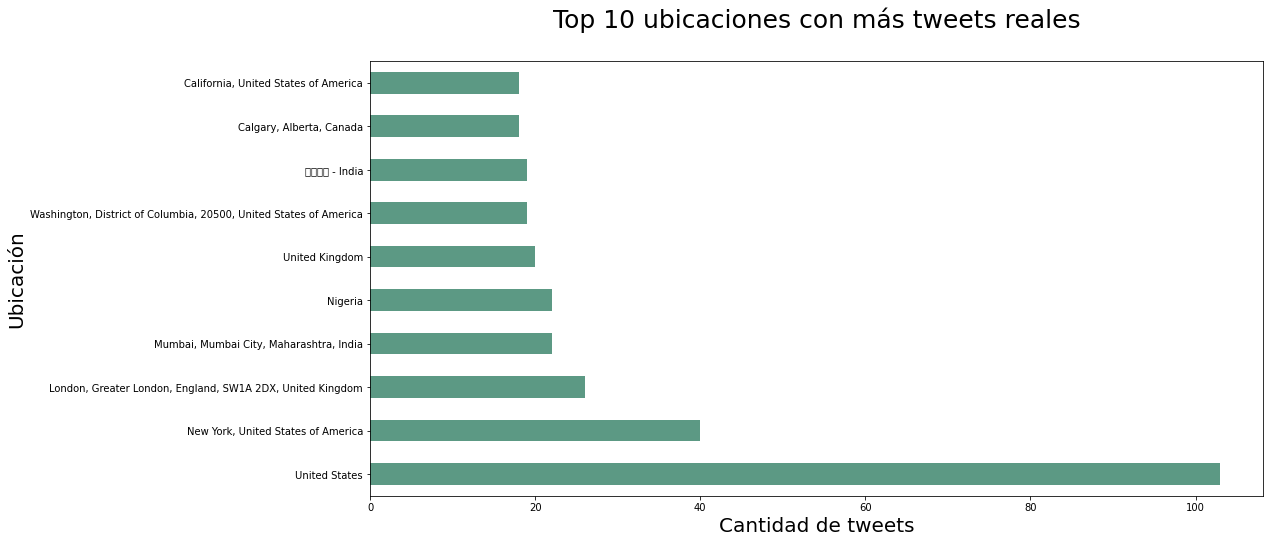

In [38]:
most_real.plot(kind='barh',  rot=0, color=(0.2, 0.5, 0.4, 0.8), figsize=(16, 8))
ax = plt.gca()
ax.set_title('Top 10 ubicaciones con más tweets reales\n', fontsize=25)
ax.set_xlabel('Cantidad de tweets', fontsize=20)
ax.set_ylabel('Ubicación', fontsize=20)
ax.get_legend().remove()

In [40]:
most_fake = by_address.nlargest(10, 'fake').loc[:,['address', 'fake']].set_index('address')
most_fake

,fake
address,
"New York, United States of America",98
United States,65
"London, Greater London, England, SW1A 2DX, United Kingdom",49
"Los Angeles, Los Angeles County, California, United States of America",32
"California, United States of America",24
United Kingdom,24
Canada,20
"Texas, United States of America",20
"Chicago, Cook County, Illinois, United States of America",19


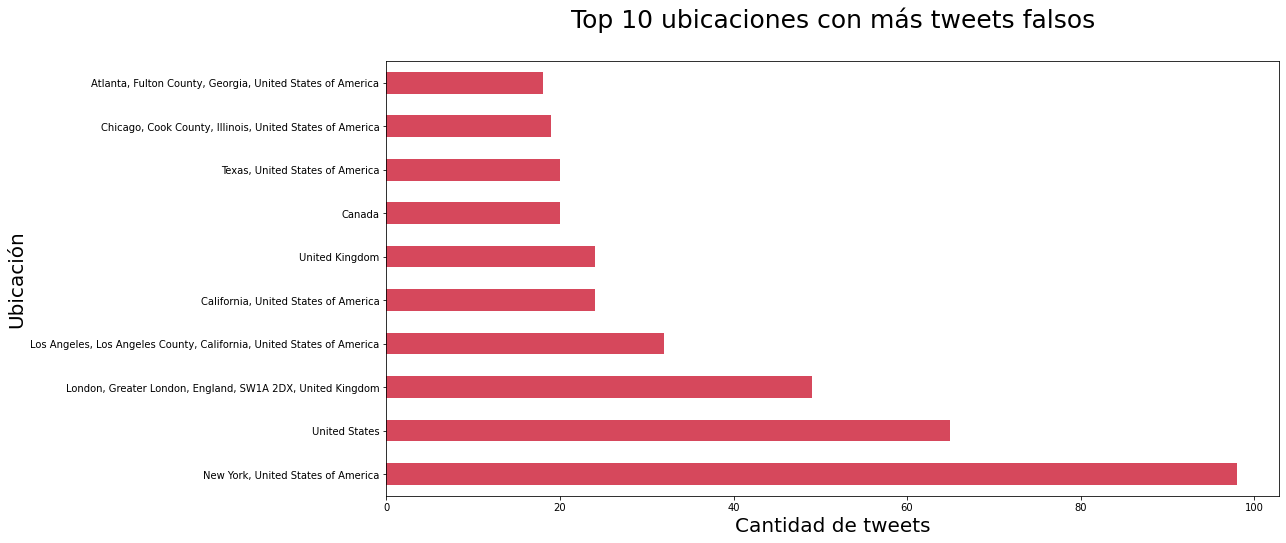

In [41]:
most_fake.plot(kind='barh',  rot=0, color=(0.8, 0.1, 0.2, 0.8), figsize=(16, 8))
ax = plt.gca()
ax.set_title('Top 10 ubicaciones con más tweets falsos\n', fontsize=25)
ax.set_xlabel('Cantidad de tweets', fontsize=20)
ax.set_ylabel('Ubicación', fontsize=20)
ax.get_legend().remove()

### Ubicaciones no encontradas

In [42]:
not_found_addr.head()

,location,target_count,target_sum,address
0,,1,1,NaN
8,indiana,1,0,NaN
9,jariana town,1,0,NaN
12,"nevada carson city,freeman st",1,1,NaN
16,nxgerxa,1,0,NaN


In [43]:
not_found_addr = not_found_addr.drop(columns=['address'])
not_found_addr.columns = ['location', 'total', 'real']

In [44]:
grouped_by_fake_loc = not_found_addr.groupby(['location']).agg({'total':'sum', 'real':'sum'}).reset_index()

In [45]:
grouped_by_fake_loc['fake'] = grouped_by_fake_loc['total'] - grouped_by_fake_loc['real']
grouped_by_fake_loc.head()

,location,total,real,fake
0,,1,1,0
1,indiana,1,0,1
2,jariana town,1,0,1
3,"nevada carson city,freeman st",1,1,0
4,nxgerxa,1,0,1


In [46]:
most_used_fake_loc = grouped_by_fake_loc.nlargest(15, 'total')
most_used_fake_loc

,location,total,real,fake
5,road to the billionaires club,6,1,5
88,edinburgh,4,0,4
18,america of founding fathers,3,1,2
29,"bangalore, india",3,1,2
53,buy give me my money,3,0,3
113,financial news and views,3,3,0
115,five down from the coffeeshop,3,2,1
361,washington dc,3,2,1
85,eastcarolina,2,1,1
89,eic,2,1,1


In [47]:
most_used_fake_loc_real = grouped_by_fake_loc.nlargest(15, 'real')
most_used_fake_loc_real

,location,total,real,fake
113,financial news and views,3,3,0
90,"el dorado, arkansas",2,2,0
98,"england, united kingdom",2,2,0
115,five down from the coffeeshop,3,2,1
163,in the potters hands,2,2,0
201,mad as hell,2,2,0
252,reddit,2,2,0
256,roaming around the world,2,2,0
292,somewhere out there,2,2,0
313,swmo,2,2,0


In [48]:
most_used_fake_loc_fake = grouped_by_fake_loc.nlargest(15, 'fake')
most_used_fake_loc_fake

,location,total,real,fake
5,road to the billionaires club,6,1,5
88,edinburgh,4,0,4
53,buy give me my money,3,0,3
18,america of founding fathers,3,1,2
29,"bangalore, india",3,1,2
1,indiana,1,0,1
2,jariana town,1,0,1
4,nxgerxa,1,0,1
6,a botanical garden probably,1,0,1
7,a hoop somewhere,1,0,1


### Paises en el set

In [49]:
by_address['country'] = by_address['address'].str.split(pat = ",")
by_address.head()

,address,total,real,location_list,fake,country
0,"(B-40);Terrassa nord;Matadepera, Autopista Bar...",1,0,prov,1,"[(B-40);Terrassa nord;Matadepera, Autopista B..."
1,"1, Route Y, Lede, Ripley County, Missouri, 639...",1,1,im in route,0,"[1, Route Y, Lede, Ripley County, Missouri..."
2,"1, South Rent Car Road, East Haven, Houston, H...",1,1,in the shadows,0,"[1, South Rent Car Road, East Haven, Housto..."
3,"188, Շահումյան փողոց, Գյումրի, Շիրակի մարզ, 31...",1,0,a sofa,1,"[188, Շահումյան փողոց, Գյումրի, Շիրակի մարզ..."
4,"2551, Woodcreek Oaks Boulevard, Roseville, Pla...",1,0,"woodcreek hs, roseville, ca",1,"[2551, Woodcreek Oaks Boulevard, Roseville, ..."


In [50]:
by_address.loc[:, 'country'] = by_address.country.map(lambda x: x[-1])

In [51]:
by_address.head()

,address,total,real,location_list,fake,country
0,"(B-40);Terrassa nord;Matadepera, Autopista Bar...",1,0,prov,1,España
1,"1, Route Y, Lede, Ripley County, Missouri, 639...",1,1,im in route,0,United States of America
2,"1, South Rent Car Road, East Haven, Houston, H...",1,1,in the shadows,0,United States of America
3,"188, Շահումյան փողոց, Գյումրի, Շիրակի մարզ, 31...",1,0,a sofa,1,Armenia
4,"2551, Woodcreek Oaks Boulevard, Roseville, Pla...",1,0,"woodcreek hs, roseville, ca",1,United States of America


In [52]:
by_address.loc[:, 'country'] = by_address.country.str.strip()
by_country = by_address.groupby(['country']).agg({'total': 'sum', 'real': 'sum', 'fake': 'sum'}).reset_index().sort_values('total', ascending=False)
by_country.head()

,country,total,real,fake
98,United States of America,1705,700,1005
96,United Kingdom,384,143,241
15,Canada,239,114,125
97,United States,168,103,65
5,Australia,106,57,49


In [53]:
by_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 98 to 90
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  133 non-null    object
 1   total    133 non-null    int64 
 2   real     133 non-null    int64 
 3   fake     133 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.2+ KB


In [54]:
countries = pd.Series(by_country.country).to_list()

In [55]:
import re
alpha_space = re.compile('^[a-zA-Z_ ]*$')

to_change = {}
for element in countries:
    coincidences = [s for s in countries if element in s]
    if len(coincidences) > 1:
        name = max(coincidences, key=len)
        if not alpha_space.match(name):
            name = min(coincidences, key=len)
        to_change.update({coincidence:name for coincidence in coincidences if coincidence != name})
    
print(to_change)

{'United States': 'United States of America', 'भारत - India': 'India', 'New Zealand / Aotearoa': 'New Zealand', 'China 中国': '中国', 'Africa': 'South Africa', '日本 (Japan)': '日本', 'Egypt / مصر': 'مصر', 'Saudi Arabia / السعودية': 'السعودية'}


In [56]:
to_change.pop('Africa', None)

'South Africa'

In [57]:
by_country.country = by_country.country.replace(to_change) 

In [58]:
by_country.head()

,country,total,real,fake
98,United States of America,1705,700,1005
96,United Kingdom,384,143,241
15,Canada,239,114,125
97,United States of America,168,103,65
5,Australia,106,57,49


In [59]:
by_country = by_country.groupby(['country']).agg({'total': 'sum', 'real': 'sum', 'fake': 'sum'}).reset_index().sort_values('total', ascending=False)
by_country.nlargest(10, 'total')

,country,total,real,fake
93,United States of America,1873,803,1070
92,United Kingdom,384,143,241
15,Canada,239,114,125
33,India,108,73,35
5,Australia,106,57,49
55,Nigeria,61,43,18
43,Kenya,39,15,24
63,Philippines,39,15,24
38,Italia,34,10,24
66,República Dominicana,32,21,11


In [60]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [61]:
try:
    from googletrans import Translator
    translator = Translator()
    by_country['translated_country'] = by_country['country'].apply(translator.translate, dest='en').apply(getattr, args=('text',))
    by_country.head()
except Exception as e:
    print(e)

In [62]:
by_country.head()

,country,total,real,fake,translated_country
93,United States of America,1873,803,1070,United States of America
92,United Kingdom,384,143,241,United Kingdom
15,Canada,239,114,125,Canada
33,India,108,73,35,India
5,Australia,106,57,49,Australia


In [63]:
world = world.merge(by_country, left_on='name', right_on='translated_country', how='left')
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,total,real,fake,translated_country
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,1.0,1.0,0.0,Tanzania
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,239.0,114.0,125.0,Canada
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,1873.0,803.0,1070.0,United States of America


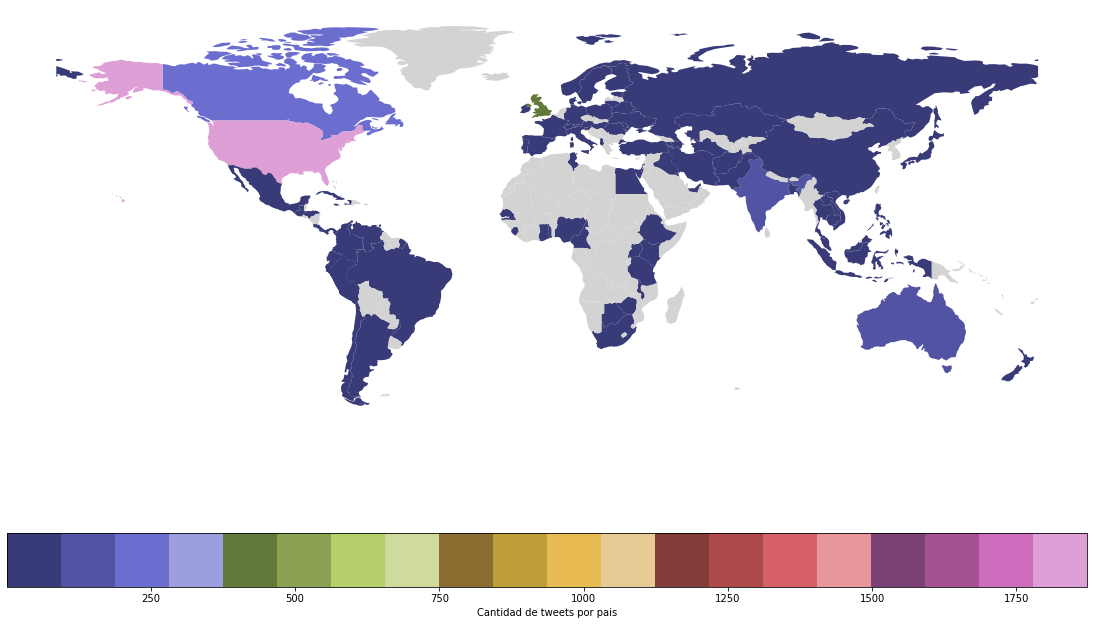

In [64]:
world = world[(world.name!="Antarctica")]
fig= plt.figure(figsize=(15,10))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
world.plot(column="total", legend=True,\
           legend_kwds={'label': "Cantidad de tweets por pais", 'orientation': "horizontal"},\
           missing_kwds={"color": "lightgrey", "label": "Missing values"}, cmap='tab20b', ax=ax)

In [65]:
top_by_country = by_country.nlargest(10, 'total')

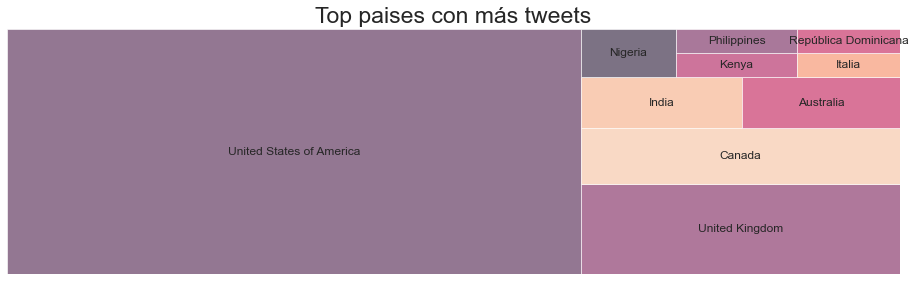

In [187]:
import squarify
import matplotlib

norm = matplotlib.colors.Normalize(vmin=min(top_by_country.total), vmax=max(top_by_country.total))
colors = [matplotlib.cm.Blues(norm(value)) for value in top_by_country.total]
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)
squarify.plot(label=top_by_country.country,sizes=top_by_country.total, alpha=.6)
plt.title('Top paises con más tweets', fontsize=23)
plt.axis('off')
plt.show()

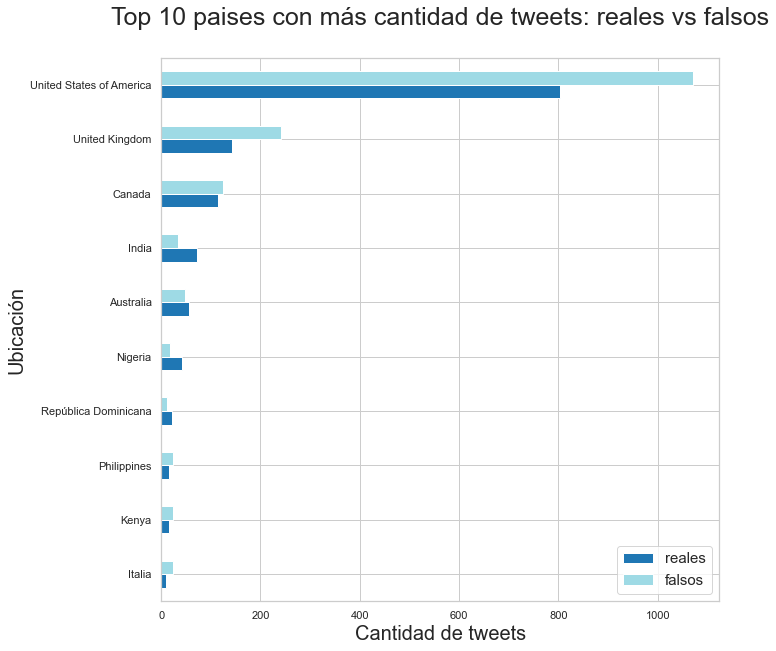

In [92]:
ax = by_country.set_index('country').nlargest(10, 'total').sort_values(by=['real']).loc[:, ['real', 'fake']].plot(kind='barh', figsize=(10, 10), colormap='tab20')
ax.set_title('Top 10 paises con más cantidad de tweets: reales vs falsos\n', fontsize=25)
ax.set_xlabel('Cantidad de tweets', fontsize=20)
ax.set_ylabel('Ubicación', fontsize=20)
ax.legend(labels=['reales', 'falsos'], fontsize=15)

### Relacion real-falso con location, keyword vacías

In [71]:
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [72]:
no_location = tweets[tweets['location'].isnull()]
no_keyword = tweets[tweets['keyword'].isnull()]

In [73]:
no_location.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [74]:
no_keyword.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [75]:
no_location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2452 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        2452 non-null   int64 
 1   keyword   2396 non-null   object
 2   location  0 non-null      object
 3   text      2452 non-null   object
 4   target    2452 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 114.9+ KB


In [76]:
no_keyword.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        56 non-null     int64 
 1   keyword   0 non-null      object
 2   location  0 non-null      object
 3   text      56 non-null     object
 4   target    56 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.6+ KB


In [77]:
no_location['len'] = no_location['text'].str.len()

In [78]:
no_location.head()

,id,keyword,location,text,target,len
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [79]:
no_location['target'].value_counts()

0    1430
1    1022
Name: target, dtype: int64

In [80]:
no_keyword['target'].value_counts()

1    37
0    19
Name: target, dtype: int64

Text(0, 0.5, 'Largo del tweet')

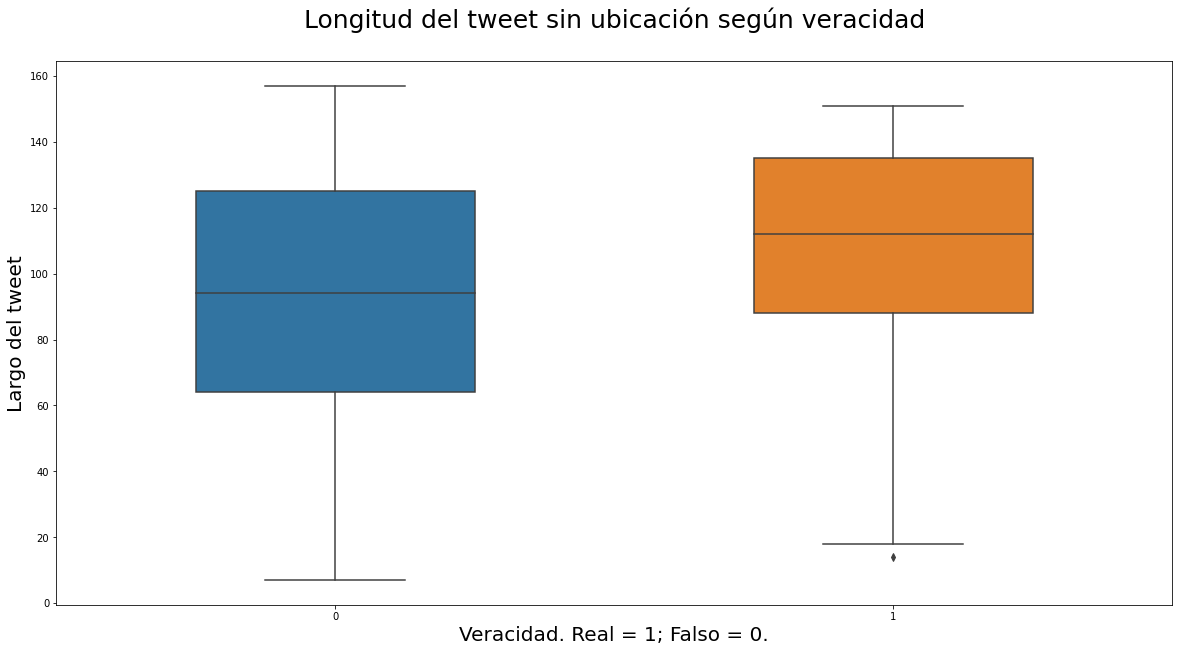

In [85]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="target", y="len", data=no_location, width = 0.5)
ax.set_title("Longitud del tweet sin ubicación según veracidad\n", fontsize=25)
ax.set_xlabel("Veracidad. Real = 1; Falso = 0.", fontsize=20)
ax.set_ylabel("Largo del tweet", fontsize=20)

### Relación condados costeros de Estados Unidos y el ratio de desastres reales

In [ ]:
by_address.head()

In [ ]:
coastal_counties = pd.read_csv('coastal_counties_usa.csv', usecols = ['County','State','FIPS'])
coastal_counties.head()

In [ ]:
coastal_counties['Location'] = coastal_counties[['County','State']].agg(','.join, axis = 1) + ',' + coastal_counties['FIPS'].astype('str')
#coastal_counties['Location'] = coastal_counties['State'] + ',' + coastal_counties['FIPS'].astype('str')
coastal_counties.head()

In [ ]:
coastal_counties_list = coastal_counties['Location'].to_list()
coastal_counties_dict = {}
for location in coastal_counties_list:
    county, state, FIPS = location.split(',')
    coastal_counties_dict[county] = coastal_counties_dict.get(county, (state,FIPS))

#coastal_counties_dict = pd.Series(coastal_counties['Location'].to_list(),index=coastal_counties['County']).to_dict()
#coastal_counties_dict

In [ ]:
def is_coastal(lista):
    for word in lista:
        if word in coastal_counties_dict: return True
    return False

def return_coastal_county(lista):
    for word in lista:
        if word in coastal_counties_dict: 
            return word + ',' + coastal_counties_dict[word][0]
            #return word + ',' + coastal_counties_dict[word].split(',')[0]

def return_coastal_county_FIPS(lista):
    for word in lista:
        if word in coastal_counties_dict: 
            return coastal_counties_dict[word][1]
            #return coastal_counties_dict[word].split(',')[1]

us_address = by_address[by_address['address'].str.contains('United States')]
us_address['address'] = us_address['address'].apply(lambda x: x.replace(',','').split())
us_address['is_coastal'] = us_address['address'].apply(lambda x: is_coastal(x))
us_address['coastal_county_name'] = us_address[us_address['is_coastal']]['address'].apply(lambda x: return_coastal_county(x))
us_address['coastal_county_FIPS'] = us_address[us_address['is_coastal']]['address'].apply(lambda x: return_coastal_county_FIPS(x))
us_address[us_address['is_coastal']].head()

In [ ]:
us_realdisasters_FIPS = us_address[us_address['is_coastal']].groupby('coastal_county_FIPS')['real'].sum().to_frame()
us_realdisasters_FIPS = us_realdisasters_FIPS[us_realdisasters_FIPS['real'] > 0]
us_realdisasters_FIPS.head()

In [ ]:
import plotly.figure_factory as ff

fips = us_realdisasters_FIPS.index.tolist()
values = us_realdisasters_FIPS['real'].tolist()

colorscale = ['rgb(0.2235294117647059, 0.23137254901960785, 0.4745098039215686)',
 'rgb(0.3215686274509804, 0.32941176470588235, 0.6392156862745098)',
 'rgb(0.4196078431372549, 0.43137254901960786, 0.8117647058823529)',
 'rgb(0.611764705882353, 0.6196078431372549, 0.8705882352941177)',
 'rgb(0.38823529411764707, 0.4745098039215686, 0.2235294117647059)',
 'rgb(0.5490196078431373, 0.6352941176470588, 0.3215686274509804)',
 'rgb(0.7098039215686275, 0.8117647058823529, 0.4196078431372549)',
 'rgb(0.807843137254902, 0.8588235294117647, 0.611764705882353)',
 'rgb(0.5490196078431373, 0.42745098039215684, 0.19215686274509805)',
 'rgb(0.7411764705882353, 0.6196078431372549, 0.2235294117647059)',
 'rgb(0.9058823529411765, 0.7294117647058823, 0.3215686274509804)',
 'rgb(0.9058823529411765, 0.796078431372549, 0.5803921568627451)',
 'rgb(0.5176470588235295, 0.23529411764705882, 0.2235294117647059)',
 'rgb(0.6784313725490196, 0.28627450980392155, 0.2901960784313726)',
 'rgb(0.8392156862745098, 0.3803921568627451, 0.4196078431372549)']
 
fig = ff.create_choropleth(fips=fips, values=values,colorscale = colorscale, title_text = 'Distribución de tweets reales según condado costero de USA',legend_title = 'Cantidad de tweets reales', state_outline={'color': 'rgb(99,99,99)', 'width': 0.3}, asp = 2.9)
fig.layout.template = None
fig.layout.update({'height': 720})
fig.layout.update({'width': 1280})
fig.show()

En base a lo visto arriba en el mapa, se analiza qué tipo de desastres ocurrieron en dichas ubicaciones.

Hipotesis: Como se vio en las coastal counties uno imaginaria que las keywords de dichos tweets estarian relacionados a desastres comunes en proporcion normal y naturales en proporcion mayor, entre los cuales podria estar inundaciones, huracanes, tornados, tormentas tropicales (florida), entre otros desastres naturales que suelen ocurrir en zonas costeras.

In [ ]:
text_merge = tweets.loc[:, ['text', 'target', 'keyword', 'location']]
text_merge['location'] = text_merge['location'].str.lower()
locations_data = address.loc[:, ['location', 'address']]
text_merge = text_merge.merge(locations_data, left_on='location', right_on='location', how='left')
text_merge = text_merge.loc[ (text_merge['address'].isnull() == False),:]
text_merge.head()

In [ ]:
us_address_keyword = text_merge[text_merge['address'].str.contains('United States')]
us_address_keyword['address'] = us_address_keyword['address'].apply(lambda x: x.replace(',','').split())
us_address_keyword['is_coastal'] = us_address_keyword['address'].apply(lambda x: is_coastal(x))
grouped_by_keyword = us_address_keyword[us_address_keyword['is_coastal']].groupby('target')['keyword']
grouped_by_keyword = grouped_by_keyword.value_counts().to_frame()
grouped_by_keyword.columns = ['count']
grouped_by_keyword = grouped_by_keyword.reset_index().set_index('keyword')
grouped_by_keyword.index = grouped_by_keyword.index.str.replace('%20',' ')
grouped_by_keyword[grouped_by_keyword['target'] == 1]['count'].nlargest(5)

In [ ]:
sns.set(style="whitegrid")
data = grouped_by_keyword[grouped_by_keyword['target'] == 1]['count'].nlargest(20).to_frame()

ax = sns.barplot(x = "count", y = data.index, data = data, orient = 'h', palette = 'tab20c')
ax.set_title('Top 20 tipos de desastres reales en zona costera', fontsize = 20)
ax.set_xlabel('Cantidad de desastres ', fontsize = 15)
ax.set_ylabel('Tipo de desastre', fontsize = 15)
plt.show()